In [3]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from collections import Counter
from operator import itemgetter

In [4]:


with open("ASM_PZ2_podaci_2122/reddit2008/comments_2008_asm_v1.1/comments_2008/data_cleaned", 'rb') as file:
    dfComments = pickle.load(file)
    
with open("ASM_PZ2_podaci_2122/reddit2008/submissions_2008_asm/data_cleaned", 'rb') as file:
    dfSubmissions = pickle.load(file)
    
dfComAndSub=pd.concat([dfSubmissions, dfComments], axis=0)

In [5]:
#SNetT

maskaSub=(dfSubmissions['subreddit']=='reddit.com') | (dfSubmissions['subreddit']=='pics') | (dfSubmissions['subreddit']=='worldnews') | (dfSubmissions['subreddit']=='programming') |(dfSubmissions['subreddit']=='business') |(dfSubmissions['subreddit']=='politics') |(dfSubmissions['subreddit']=='obama') |(dfSubmissions['subreddit']=='science') |(dfSubmissions['subreddit']=='technology') |(dfSubmissions['subreddit']=='WTF') |(dfSubmissions['subreddit']=='AskReddit') |(dfSubmissions['subreddit']=='netsec') |(dfSubmissions['subreddit']=='philosophy') |(dfSubmissions['subreddit']=='videos') |(dfSubmissions['subreddit']=='offbeat') |(dfSubmissions['subreddit']=='funny') |(dfSubmissions['subreddit']=='entertainment') |(dfSubmissions['subreddit']=='linux') |(dfSubmissions['subreddit']=='geek') |(dfSubmissions['subreddit']=='gaming') |(dfSubmissions['subreddit']=='comics') |(dfSubmissions['subreddit']=='gadgets') |(dfSubmissions['subreddit']=='nsfw') |(dfSubmissions['subreddit']=='news') |(dfSubmissions['subreddit']=='environment') |(dfSubmissions['subreddit']=='atheism') |(dfSubmissions['subreddit']=='canada') |(dfSubmissions['subreddit']=='math') |(dfSubmissions['subreddit']=='Economics') |(dfSubmissions['subreddit']=='scifi') |(dfSubmissions['subreddit']=='bestof') |(dfSubmissions['subreddit']=='cogsci') |(dfSubmissions['subreddit']=='joel') |(dfSubmissions['subreddit']=='Health') |(dfSubmissions['subreddit']=='guns') |(dfSubmissions['subreddit']=='photography') |(dfSubmissions['subreddit']=='software') |(dfSubmissions['subreddit']=='history') |(dfSubmissions['subreddit']=='ideas') 
dfSubmissions=dfSubmissions[maskaSub]

maskaCom=(dfComments['subreddit']=='reddit.com') | (dfComments['subreddit']=='pics') | (dfComments['subreddit']=='worldnews') | (dfComments['subreddit']=='programming') |(dfComments['subreddit']=='business') |(dfComments['subreddit']=='politics') |(dfComments['subreddit']=='obama') |(dfComments['subreddit']=='science') |(dfComments['subreddit']=='technology') |(dfComments['subreddit']=='WTF') |(dfComments['subreddit']=='AskReddit') |(dfComments['subreddit']=='netsec') |(dfComments['subreddit']=='philosophy') |(dfComments['subreddit']=='videos') |(dfComments['subreddit']=='offbeat') |(dfComments['subreddit']=='funny') |(dfComments['subreddit']=='entertainment') |(dfComments['subreddit']=='linux') |(dfComments['subreddit']=='geek') |(dfComments['subreddit']=='gaming') |(dfComments['subreddit']=='comics') |(dfComments['subreddit']=='gadgets') |(dfComments['subreddit']=='nsfw') |(dfComments['subreddit']=='news') |(dfComments['subreddit']=='environment') |(dfComments['subreddit']=='atheism') |(dfComments['subreddit']=='canada') |(dfComments['subreddit']=='math') |(dfComments['subreddit']=='Economics') |(dfComments['subreddit']=='scifi') |(dfComments['subreddit']=='bestof') |(dfComments['subreddit']=='cogsci') |(dfComments['subreddit']=='joel') |(dfComments['subreddit']=='Health') |(dfComments['subreddit']=='guns') |(dfComments['subreddit']=='photography') |(dfComments['subreddit']=='software') |(dfComments['subreddit']=='history') |(dfComments['subreddit']=='ideas') 
dfComments=dfComments[maskaCom]



In [6]:
dfComAndSub=pd.concat([dfSubmissions, dfComments], axis=0)


In [7]:
#Broj subreddit-a - provereno za mali skup od prvih 30 redova

set_of_subreddits = set(dfComAndSub['subreddit'].unique())
print(f"Postoji { len(set_of_subreddits) } različitih subreddit-a") # formatiranje ispisa pomoću fstringa


Postoji 39 različitih subreddit-a


In [8]:
G = nx.Graph() # pravi praznu mrežu
G.add_nodes_from(set_of_subreddits)

In [9]:
dict = {}

for index, row in dfComAndSub.iterrows():
    author=row['author']
    subreddit=row['subreddit']
    if author in dict:
          #dict[author].append(subreddit) #ovo ce cuvati i subbredite koji se ponavljaju, ako nam treba da brojimo za vecu tezinu ako je vise puta objavljivao na istom subredditu
        if subreddit not in dict[author]:
            dict[author].append(subreddit)
    else:
          dict[author] = [subreddit]
            
      

In [10]:
import itertools

for key, value in dict.items(): 
    lista=value
    combinations=list(itertools.combinations(lista, 2)) #pravi sve kombinacije bez ponavljanja sa dva elementa 
    for subreddit1,subreddit2 in combinations:
        if (subreddit1, subreddit2) in G.edges:#ako vec postoji ta grana, inkrementiramo tezinu
             G.edges[subreddit1, subreddit2]['weight'] += 1 #posto je ovaj graf neusmeren, nebitno ko je prvi cvor, da je usmeren moralo bi se paziti
        else: #ako ne postoji postavimo novu granu sa tezinom 1
             G.add_edge(subreddit1, subreddit2, weight=1)


In [11]:
output_path = "SNetT.gml" #SNET

nx.write_gml(G, output_path)

In [12]:
print(nx.info(G))

Graph with 39 nodes and 741 edges


In [13]:
#7) Kolika je gustina mreže?

print(nx.density(G))

1.0


Kolike su prosečne distance u okviru mreže i dijametar mreže?
Diameter: 1
Average Path length: 1.0

U kojoj meri je mreža povezana i centralizovana? Navesti broj i veličine povezanih komponenata i proceniti da li postoji gigantska komponenta.

In [15]:
component_size_list = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)] #connected_components(G) izvuce generatore za povezane komponente, sortira se po duzini generatora
print(component_size_list) #imamo jednu dominantnu komp, ostale su male
print('Broj povezanih komponenti: '+str(len(component_size_list)))
print('Postoji jedna komponenta veličine 39, što je ujedno dominantna komponenta.')

[39]
Broj povezanih komponenti: 1
Postoji jedna komponenta veličine 39, što je ujedno dominantna komponenta.


Koliki je prosečni, a koliki globalni koeficijent klasterizacije mreže? 
Kakva je raspodela lokalnog koeficijenta klasterizacije njenih čvorova? 
Da li je klasterisanje izraženo ili ne? 
Odgovor dati upoređivanjem sa slučajno generisanom Erdos-Renyi mrežom istih dimenzija.

In [17]:
#Prosecni koeficijent klasterizaije za nasu mrezu iz nx (bez weight smo)
nx.average_clustering(G)

1.0

In [18]:
#Globalni koeficijent klasterizacije (3*numOfTriangles/numOfTriads, svi trouglovi/sve triade)
glob_koef=nx.transitivity(G)
print(glob_koef)

1.0


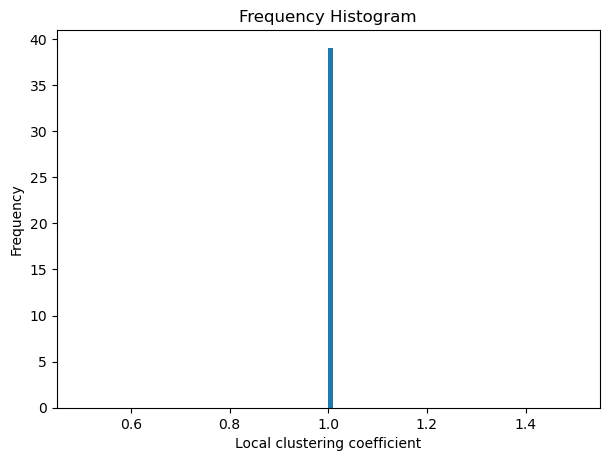

In [19]:
dict=nx.clustering(G).values() #average_clustering je avg ovih vrednosti
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})# Plot Histogram on x
x = dict
plt.hist(x, bins=100)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency',xlabel='Local clustering coefficient');

In [20]:
#Prosecni koeficijent klasterizaije za ER iz nx
m=G.number_of_edges()
n=G.number_of_nodes()
p = ( 2*float(m) ) / ( n* (n-1) ) 
er_mreza = nx.erdos_renyi_graph(n,p)
nx.average_clustering(er_mreza)


1.0

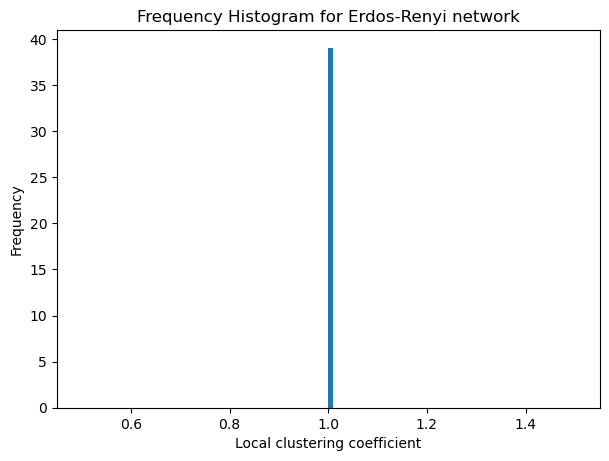

In [21]:
#Lokalni koeficijent klasterizaije za ER
dict_er=nx.clustering(er_mreza).values() #average_clustering je avg ovih vrednosti
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})# Plot Histogram on x
x = dict_er
plt.hist(x, bins=100)
plt.gca().set(title='Frequency Histogram for Erdos-Renyi network', xlabel='Local clustering coefficient',ylabel='Frequency');

Klasterizacija je maksimalno izražena kod SNetT mreže jer svi čvorovi imaju koeficijent klasterizacije jednak jedinici, s obzirom da je mreža potpuno povezana i svi pripadaju jednom klasteru. S obzirom na maskimalan broj grana, kod Ernos-Renyi mreže je klasiterizacija takođe maksimalno izražena.

Na osnovu odgovora na pitanja 8 i 10, proceniti da li mreža iskazuje osobine malog sveta. 
S obzirom na veoma male vrednosti prosečne distance (1) i dijametra(1), može se zaključiti da se do bilo kog čvora može doći u u samo jednom koraku (svi su povezani sa svima).


In [22]:
#Izvršiti asortativnu analizu po stepenu čvora i dati odgovor da li je izraženo asortativno mešanje. 
#U slučaju da je mreža usmerena, analizu izvršiti i po ulaznom i po izlaznom stepenu čvora. Priložiti i vizuelizaciju. 

r1 = nx.degree_assortativity_coefficient(G)
print(f"Koeficijent asortativnosti na osnovu netežinskog stepena čvora: {r1}")

r2 = nx.degree_assortativity_coefficient(G, weight='weight')
print(f"Koeficijent asortativnosti na osnovu težinskog stepena čvora: {r2}")

#Za netežinski graf nije moguće odrediti asortativnost jer je mreža potpuno povezana.
#U slučaju težinskog grafa mreža je neasortativna(neutralna).

Koeficijent asortativnosti na osnovu netežinskog stepena čvora: nan
Koeficijent asortativnosti na osnovu težinskog stepena čvora: 0.00010150520109314004


C:\Users\Marina\anaconda3\lib\site-packages\networkx\algorithms\assortativity\correlation.py:282: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)


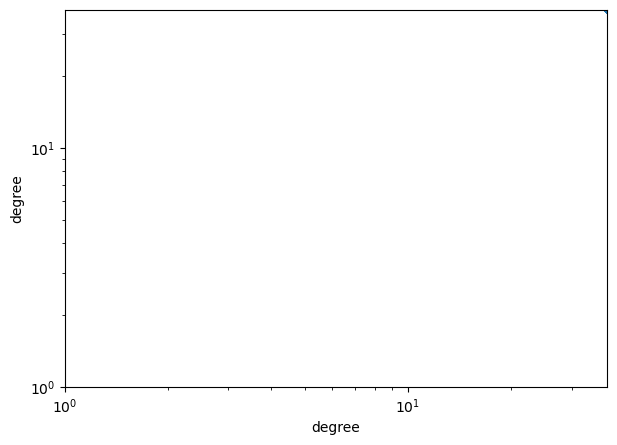

In [23]:
degrees = G.degree()
        #prolazi kroz listu svih grana i broji koliko ima cvorova odg stepena
_, deg_list = zip(*degrees)

plt.figure(1)   

# prep axes   

plt.xlabel('degree')                                                                                                             
plt.xscale('log')                                                                                                                
plt.xlim(1, max(deg_list))  

y=[]
for n in G.nodes():
    list_n=[n]
    
    degree=nx.average_neighbor_degree(G,nodes=list_n)
    #print(degree)
    #print('ok')
    y.append(list(degree.values())[0])

plt.ylabel('degree')                                                                                                          
plt.yscale('log')                                                                                                                
plt.ylim(1, max(y))                                                                                                             
                                                                                                                                                                                                    
plt.scatter(deg_list, y, marker='.')                                                                                                    
plt.show()

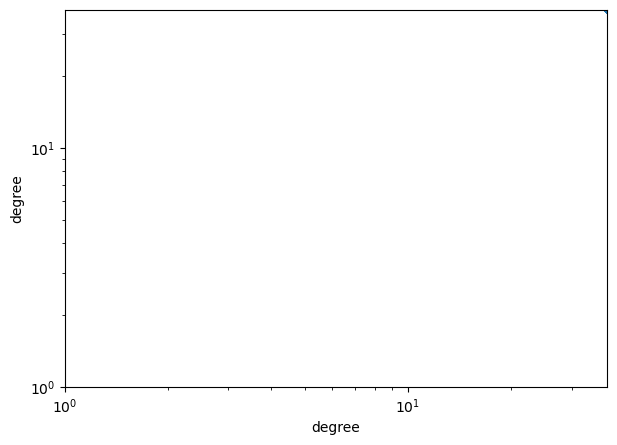

In [24]:
degrees = G.degree()
        #prolazi kroz listu svih grana i broji koliko ima cvorova odg stepena
_, deg_list = zip(*degrees)

plt.figure(1)   

# prep axes   

plt.xlabel('degree')                                                                                                             
plt.xscale('log')                                                                                                                
plt.xlim(1, max(deg_list))  
x=[]
y=[]
for n in G.nodes():
    degreeN=G.degree(n)
    for nn in G.neighbors(n):
        degreeNN=G.degree(nn)
        x.append(degreeN)
        y.append(degreeNN)

plt.ylabel('degree')                                                                                                          
plt.yscale('log')                                                                                                                
plt.ylim(1, max(y))                                                                                                             
                                                                                                                                                                                                    
plt.scatter(x, y, marker='.')                                                                                                    
plt.show()

Da li mreža ispoljava fenomen kluba bogatih (eng. rich club phenomenon)?

S obzirom da je mreža potpuno povezana, ne ispoljava fenomen kluba bogatih.

In [26]:
#Raspodela stepena cvora
def plot_deg_frequency(G, weighted = False, xscale = "log", yscale = "log"): #fja

    if weighted:
        degrees = G.degree(weight="weight")
    else:
        degrees = G.degree()
        
        #prolazi kroz listu svih grana i broji koliko ima cvorova odg stepena
    _, deg_list = zip(*degrees)
    deg_counts = Counter(deg_list)        
    print(deg_counts)
    x, y = zip(*deg_counts.items())                                                      

    plt.figure(1)   

    # prep axes   
    if weighted:
        plt.xlabel('weighted degree')  
    else:
        plt.xlabel('degree')                                                                                                             
    plt.xscale(xscale)                                                                                                                
    plt.xlim(1, max(x))  

    plt.ylabel('frequency')                                                                                                          
    plt.yscale(yscale)                                                                                                                
    plt.ylim(1, max(y))                                                                                                             
                                                                                                                                                                                                    
    plt.scatter(x, y, marker='.')                                                                                                    
    plt.show()

Counter({38: 39})


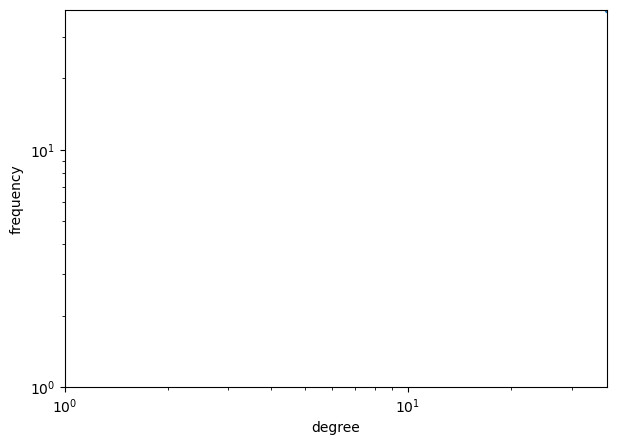

In [27]:
plot_deg_frequency(G) #Isplotujmo raspodelu netežinskog stepena čvora kao scatterplot.

Counter({85195: 1, 78928: 1, 22348: 1, 182189: 1, 30610: 1, 130797: 1, 8400: 1, 243152: 1, 232329: 1, 258597: 1, 14974: 1, 214387: 1, 219354: 1, 214226: 1, 228161: 1, 127440: 1, 39769: 1, 15510: 1, 90364: 1, 203882: 1, 84863: 1, 318110: 1, 40851: 1, 71981: 1, 44911: 1, 30429: 1, 23082: 1, 178763: 1, 8411: 1, 60204: 1, 98001: 1, 76038: 1, 2546: 1, 2735: 1, 28330: 1, 90297: 1, 74589: 1, 17130: 1, 24885: 1})


C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_13692/2068284247.py:27: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.
  plt.ylim(1, max(y))


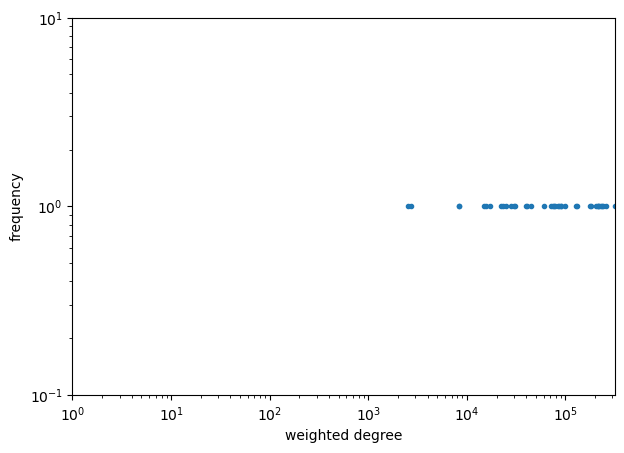

In [28]:
plot_deg_frequency(G, weighted = True) #Pošto je mreža težinska, treba ispitati i raspodelu težinskog stepena čvora.

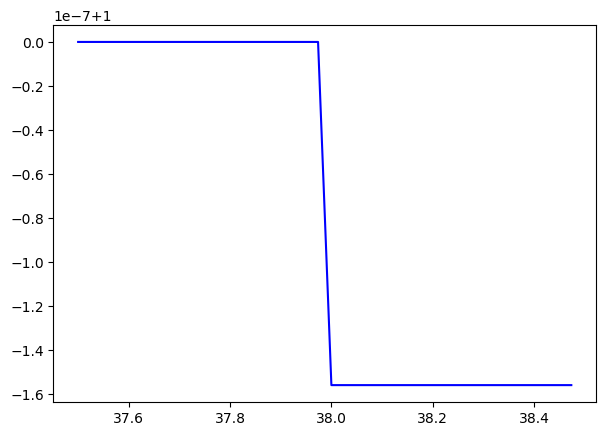

In [29]:
#Analiza i fitovanje power law mrežnog modela

#na log-log grafiku kumulativne raspodele stepena čvora bi opet trebalo da dobijemo pravu, samo sa manjim nagibom i manjim šumom u repu!
degree_sequence = sorted([d for n, d in G.degree()], reverse=True) #prodjemo kroz cvorove i njihove stepenove
degreeCount = Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

max_deg = max(deg) # hoćemo po jedan bin za svaki stepen čvora #max stepen cvorova

# izračunavanje histograma
values, base = np.histogram(deg, bins = max_deg) #za svaki stepen po jedan bin da iscrta

# kumulativna suma (inkluzivna prefiksna suma)
cumulative = np.cumsum(values)

# plotovanje komplementarne kumulativne raspodele stepena čvora P(X>x)
plt.plot(base[:-1], [float(x)/len(dfComAndSub) for x in len(dfComAndSub) - cumulative], c='blue')

plt.show()

In [30]:
!pip install powerlaw
import powerlaw

You should consider upgrading via the 'C:\Users\Marina\anaconda3\python.exe -m pip install --upgrade pip' command.


In [31]:
print(degree_sequence)

[38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38]


In [32]:
results = powerlaw.Fit(degree_sequence)
print(results.power_law.alpha)#ono alfa u formuli
print(results.power_law.xmin) #od koje vr pocinje powerlaw za ove podatke, ostatak je odsekao
print(results.power_law.sigma) #koliko odstupaju podaci, treba sto manje, da bude sto bolje fitovano

R, p = results.distribution_compare('power_law', 'exponential') #da li neka druga distribucija fituje bolje, treba da uporedimo nekoliko i ako powerlaw fituje najbolje, mozemo smatrati da je to powerlaw raspodela
print(f"Loglikelihood ratio: {R}") #ako je pozitivno verovatnije je da su podaci po prvoj (powerlaw) raspodeli, ako je neg. po drugoj, sto je vece, veca je verovatnoca
print(f"Statistical significance: {p}") #pretpostavimo da nije powerlaw nego random, p predstavlja koja je verovatnoca da random izvlacenjem podataka dobijemo da izleda isto tako slika, ako je velika verovatnoca, to je velika sansa da zaista nema powerlaw efekta 
# ako je mala sansa da random podacima dobijemo ovako, to znaci da vrv ima powerlaw
#u slucaju kada ovako ima dva parametra malo p znaci da je mala verovtanoca da je promasio da je prvi arg. bolji od drugog, sto je manja verovatnoca to smo sigurniji da je prvi model bolji od drugog

R, p = results.distribution_compare('power_law', 'truncated_power_law') #truncated je da li treba odseci deo i fitovati ostatak
print(f"Loglikelihood ratio: {R}")
print(f"Statistical significance: {p}") #99,5 % - preklapaju se u velioj kolicini

R, p = results.distribution_compare('truncated_power_law', 'power_law') #truncated je da li treba odseci deo i fitovati ostatak
print(f"Loglikelihood ratio: {R}")
print(f"Statistical significance: {p}") #99,5 % - preklapaju se u velioj kolicini

R, p = results.distribution_compare('truncated_power_law', 'lognormal_positive') #truncated je da li treba odseci deo i fitovati ostatak
print(f"Loglikelihood ratio: {R}")
print(f"Statistical significance: {p}") #99,5 % - preklapaju se u velioj kolicini

R, p = results.distribution_compare('truncated_power_law', 'stretched_exponential') #truncated je da li treba odseci deo i fitovati ostatak
print(f"Loglikelihood ratio: {R}")
print(f"Statistical significance: {p}") #99,5 % - preklapaju se u velioj kolicini

R, p = results.distribution_compare('truncated_power_law', 'lognormal') #truncated je da li treba odseci deo i fitovati ostatak
print(f"Loglikelihood ratio: {R}")
print(f"Statistical significance: {p}") #99,5 % - preklapaju se u velioj kolicini

results = powerlaw.Fit(degree_sequence)
print(results.truncated_power_law.alpha)#ono alfa u formuli
print(results.truncated_power_law.xmin) #od koje vr pocinje powerlaw za ove podatke, ostatak je odsekao
#print(results.truncated_power_law.sigma)  #ne postoji za truncated

Calculating best minimal value for power law fit


Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
C:\Users\Marina\anaconda3\lib\site-packages\powerlaw.py:1151: RuntimeWarning: invalid value encountered in double_scalars
  self.alpha = 1 + (self.n / sum(log(data/self.xmin)))


nan
nan
nan
Loglikelihood ratio: 0
Statistical significance: 1
Loglikelihood ratio: 0
Statistical significance: 1
Loglikelihood ratio: 0
Statistical significance: 1
Loglikelihood ratio: 0
Statistical significance: 1
Loglikelihood ratio: 0
Statistical significance: 1
Loglikelihood ratio: 0
Statistical significance: 1
Calculating best minimal value for power law fit
nan
nan


C:\Users\Marina\anaconda3\lib\site-packages\powerlaw.py:1170: RuntimeWarning: invalid value encountered in double_scalars
  return 1 + len(data)/sum(log(data / (self.xmin)))
Not enough data. Returning nan
Not enough data. Returning nan
C:\Users\Marina\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Marina\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
No valid fits found.
Not enough data. Returning nan
Assuming nested distributions
C:\Users\Marina\anaconda3\lib\site-packages\powerlaw.py:1383: RuntimeWarning: invalid value encountered in double_scalars
  alpha = 1 + len(data)/sum( log( data / (self.xmin) ))
No valid fits found.
Not enough data. Returning nan
Assuming nested distributions
C:\Users\Marina\anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: D

Ne može se fitovati nijedna raspodela s obzirom da je mreža potpuni graf.

Takođe, iz istog razloga svi čvorovi predstavljaju habove i autoritete i čine jezgro mreže.

In [34]:
#Analiza različitih tipova centralnosti
def calculate_centralities(G):

    DC_dict = nx.degree_centrality(G) #centr. po stepenu
    CC_dict = nx.closeness_centrality(G) #centr. po blizini
    BC_dict = nx.betweenness_centrality(G) #relaciona centr.
    EVC_dict = nx.eigenvector_centrality(G, weight='weight') #po svojstvenom vektoru

    df1 = pd.DataFrame.from_dict(DC_dict, orient='index', columns=['DC'])
    df2 = pd.DataFrame.from_dict(CC_dict, orient='index', columns=['CC'])
    df3 = pd.DataFrame.from_dict(BC_dict, orient='index', columns=['BC'])
    df4 = pd.DataFrame.from_dict(EVC_dict, orient='index', columns=['EVC'])
    df = pd.concat([df1, df2, df3, df4], axis=1)
    return df

dataCentralitiesSNet=[]
dataCentralitiesSNet = calculate_centralities(G)
print(dataCentralitiesSNet)

                DC   CC   BC       EVC
Economics      1.0  1.0  0.0  0.098795
videos         1.0  1.0  0.0  0.087986
netsec         1.0  1.0  0.0  0.023598
programming    1.0  1.0  0.0  0.223552
scifi          1.0  1.0  0.0  0.031580
offbeat        1.0  1.0  0.0  0.150658
guns           1.0  1.0  0.0  0.008559
pics           1.0  1.0  0.0  0.295383
funny          1.0  1.0  0.0  0.282876
politics       1.0  1.0  0.0  0.316795
photography    1.0  1.0  0.0  0.015306
WTF            1.0  1.0  0.0  0.260283
technology     1.0  1.0  0.0  0.267162
worldnews      1.0  1.0  0.0  0.262058
science        1.0  1.0  0.0  0.276321
gaming         1.0  1.0  0.0  0.150288
news           1.0  1.0  0.0  0.041415
canada         1.0  1.0  0.0  0.016688
AskReddit      1.0  1.0  0.0  0.099836
entertainment  1.0  1.0  0.0  0.249799
nsfw           1.0  1.0  0.0  0.098759
reddit.com     1.0  1.0  0.0  0.379798
linux          1.0  1.0  0.0  0.044794
geek           1.0  1.0  0.0  0.078092
bestof         1.0  1.0  

In [35]:
#Centralnost po stepenu - stepen čvora normalizovan maksimalnim mogućim stepenom čvora tj n-1. 
#U slučaju usmerenog grafa, ulazni i izlazni stepen čvora odgovaraju ulaznoj i izlaznoj centralnosti po stepenu. 
df_dc = pd.DataFrame({'DC':dataCentralitiesSNet['DC']})
df_dc.sort_values(by='DC', ascending=False, inplace = True)
print(df_dc.head(10)) #najvecih 10 uzimamo da analiziramo

            DC
Economics  1.0
obama      1.0
linux      1.0
geek       1.0
bestof     1.0
Health     1.0
math       1.0
business   1.0
software   1.0
atheism    1.0


In [36]:
#Centralnost po bliskosti - koliko je čvor *udaljen* od drugih u mreži. Čvorovi koji su centralniji su bolji izvori širenja informacija.  
#recipročna vrednost sume najkraćih rastojanja od posmatranog čvora do ostalih sa kojima je povezan, normalizovana sa N-1
df_cc = pd.DataFrame({'CC':dataCentralitiesSNet['CC']})
df_cc.sort_values(by='CC', ascending=False, inplace = True)
print(df_cc.head(10)) #dovoljno je da budu povezani sa jednim cvorom koji je blizak sa dosta njih i imace dobru centr., br hopova +1

            CC
Economics  1.0
obama      1.0
linux      1.0
geek       1.0
bestof     1.0
Health     1.0
math       1.0
business   1.0
software   1.0
atheism    1.0


In [37]:
#Relaciona centralnost (betweenness centrality) govori na koliko se najkraćih putanja između drugih čvorova neki čvor nalazi
# u odnosu na ukupan broj takvih najkraćih puteva
#U slučaju socijalne mreže, akter sa visokom relacionom centralnošću kontrološe tok informacija i predstavlja kandidata za brokerski čvor
df_bc = pd.DataFrame({'BC':dataCentralitiesSNet['BC']})
df_bc.sort_values(by='BC', ascending=False, inplace = True)
print(df_bc.head(10)) #povezani su sa subredditima iz raznih drugih oblasti, i onda ako drugi nisu povezani sa ostalima svi najkraci putevi idu preko njih

            BC
Economics  0.0
obama      0.0
linux      0.0
geek       0.0
bestof     0.0
Health     0.0
math       0.0
business   0.0
software   0.0
atheism    0.0


Mreža je potpuno povezani graf pa svi imaju iste vrednosti prethodnih centralnosti i svi su podjednako bitni.

In [38]:
#Centralnost po sopstvenom vektoru - koliko je uticajan čvor u mreži. 
#Ideja je da su čvorovi povezani sa manje uticajnim susedima više uticajni (//bitniji su od njih, ovo je alternativna verzija(bonacich//) 
#i da je uticajnost čvora proporcionalna zbiru uticajnosti njegovih suseda (//vise uticajan, mocan ako su oni vise uticajni, kontradiktorno malo u odnosu na onaj prvi deo..//)
df_evc = pd.DataFrame({'EVC':dataCentralitiesSNet['EVC']})
df_evc.sort_values(by='EVC', ascending=False, inplace = True)
print(df_evc.head(10)) #puno se pojavljuju i medjusobno su povezani

                    EVC
reddit.com     0.379798
politics       0.316795
pics           0.295383
funny          0.282876
science        0.276321
technology     0.267162
worldnews      0.262058
WTF            0.260283
entertainment  0.249799
programming    0.223552


In [39]:
#Katz centralnost

#Katz centralnost uzima u obzir putanje svih mogućih dužina koje spajaju dva čvora i uvodi podesivi parametar slabljenja  𝛼
#nedirektni susedi i ta povezanost treba da doprinosi centralnosti ali sa nekim koef. slabljenja
#Ako je G usmeren, vraća ulazne Katz centralnosti, za izlazne Katz centralnosti treba prvo uraditi G.reverse().
#Da bi vrednost centralnosti konvergirala, mora važiti 0 < alpha < 1/lambda_max, gde je lambda_max najveća sopstvena vrednost matrice susednosti. 
#ove centralnosti pogotovo poslednje dve ne rade kada ima ovako vise od jedne povezane komponente!!

lambda_max =  max(nx.adjacency_spectrum(G))
print(1/lambda_max)

(5.566353396409633e-06+0j)


In [53]:
#Katz, svi subredditi imaju parametar beta=1

#dataCentralitiesSNet.drop('Katz_Beta', inplace=True, axis=1)

betadict={}
for subreddit in G.nodes():
    betadict[subreddit] = 1
    
KatzC_dictBeta = nx.katz_centrality(G, alpha=0.000005, beta=betadict, max_iter=1000, tol=1e-06, nstart=None, normalized=True, weight='weight')
df_katzc = pd.DataFrame.from_dict(KatzC_dictBeta, orient='index', columns=['Katz'])
dataCentralitiesSNet['Katz']=df_katzc

df_katzc = pd.DataFrame({'Katz':dataCentralitiesSNet['Katz']})
df_katzc.sort_values(by='Katz', ascending=False, inplace = True)
print(df_katzc.head(10))

                   Katz
reddit.com     0.361722
politics       0.304730
pics           0.285821
funny          0.274594
science        0.268861
technology     0.260549
worldnews      0.255887
WTF            0.254480
entertainment  0.244919
programming    0.221450


In [47]:
#Katz sa razlicitim beta za reddit.com, sa weight

#dataCentralitiesSNet.drop('Katz_Beta', inplace=True, axis=1)

betadict={}
for subreddit in G.nodes():
    betadict[subreddit] = 0.1
    
betadict['reddit.com'] = 1
KatzC_dictBeta = nx.katz_centrality(G, alpha=0.000005, beta=betadict, max_iter=1000, tol=1e-06, nstart=None, normalized=True, weight='weight')
df_katzc = pd.DataFrame.from_dict(KatzC_dictBeta, orient='index', columns=['Katz_Beta'])
dataCentralitiesSNet['Katz_Beta']=df_katzc

df_katzc = pd.DataFrame({'Katz_Beta':dataCentralitiesSNet['Katz_Beta']})
df_katzc.sort_values(by='Katz_Beta', ascending=False, inplace = True)
print(df_katzc.head(10))

               Katz_Beta
reddit.com      0.453031
politics        0.299495
pics            0.278568
funny           0.267059
science         0.261091
technology      0.253347
worldnews       0.248100
WTF             0.246293
entertainment   0.237752
programming     0.213624


In [48]:
#Katz sa razlicitim beta za reddit.com, sa weight, alfa=0.00000025

dataCentralitiesSNet.drop('Katz_Beta', inplace=True, axis=1)

betadict={}
for subreddit in G.nodes():
    betadict[subreddit] = 0.1
    
betadict['reddit.com'] = 1 
KatzC_dictBeta = nx.katz_centrality(G, alpha=0.00000025, beta=betadict, max_iter=1000, tol=1e-06, nstart=None, normalized=True, weight='weight')
df_katzc = pd.DataFrame.from_dict(KatzC_dictBeta, orient='index', columns=['Katz_Beta'])
dataCentralitiesSNet['Katz_Beta']=df_katzc

df_katzc = pd.DataFrame({'Katz_Beta':dataCentralitiesSNet['Katz_Beta']})
df_katzc.sort_values(by='Katz_Beta', ascending=False, inplace = True)
print(df_katzc.head(10))

               Katz_Beta
reddit.com      0.842735
politics        0.095008
pics            0.093595
funny           0.093070
science         0.092815
technology      0.092714
worldnews       0.092276
entertainment   0.092142
WTF             0.092133
business        0.091244


In [54]:
#Kompozitni rang
#𝑐𝑜𝑚𝑝𝑜𝑠𝑖𝑡𝑒_𝑟𝑎𝑛𝑘=𝐷𝐶_𝑟𝑎𝑛𝑘∗𝐶𝐶_𝑟𝑎𝑛𝑘∗𝐵𝐶_𝑟𝑎𝑛𝑘∗𝐸𝑉𝐶_𝑟𝑎𝑛𝑘*Katz_rank
df_ = dataCentralitiesSNet
labele = ['DC', 'CC', 'BC', 'EVC','Katz']
for metric in labele:
    df_[f"{metric}_rank"] = dataCentralitiesSNet[f"{metric}"].rank(ascending=False) 
    
df_['composite_rank'] = df_['DC_rank'] * df_['CC_rank'] * df_['BC_rank'] * df_['EVC_rank'] * df_['Katz_rank']

df_=df_.sort_values(['composite_rank'], ascending = True)
print(df_.head(10))

                DC   CC   BC       EVC  Katz_Beta  DC_rank  CC_rank  BC_rank  \
reddit.com     1.0  1.0  0.0  0.379798   0.361722     20.0     20.0     20.0   
politics       1.0  1.0  0.0  0.316795   0.304730     20.0     20.0     20.0   
pics           1.0  1.0  0.0  0.295383   0.285821     20.0     20.0     20.0   
funny          1.0  1.0  0.0  0.282876   0.274594     20.0     20.0     20.0   
science        1.0  1.0  0.0  0.276321   0.268861     20.0     20.0     20.0   
technology     1.0  1.0  0.0  0.267162   0.260549     20.0     20.0     20.0   
worldnews      1.0  1.0  0.0  0.262058   0.255887     20.0     20.0     20.0   
WTF            1.0  1.0  0.0  0.260283   0.254480     20.0     20.0     20.0   
entertainment  1.0  1.0  0.0  0.249799   0.244919     20.0     20.0     20.0   
programming    1.0  1.0  0.0  0.223552   0.221450     20.0     20.0     20.0   

               EVC_rank      Katz  Katz_rank  composite_rank  
reddit.com          1.0  0.361722        1.0          80

In [55]:
#SPEKTRALNA ANALIZA
from scipy import linalg
#from docx import Document #//baca gresku ovo
import math #?
import sympy
from sklearn.cluster import SpectralClustering

In [56]:
def plot_scatterplot(x_data, y_data, x_label, y_label, title):
    fig, ax = plt.subplots()
    ax.scatter(x_data, y_data) 
    ax.set_ylabel(y_label, fontsize=15)
    ax.set_xlabel(x_label, fontsize=15)
    ax.set_title(title)
    plt.savefig(f"{title}.svg")
    plt.show() 

def plot_scatterplot2(x_data, y_data, x_label, y_label, title, file_name):
    fig, ax = plt.subplots()
    ax.scatter(x_data, y_data) 
    ax.set_ylabel(y_label, fontsize=15)
    ax.set_xlabel(x_label, fontsize=15)
    ax.set_title(title)
    plt.savefig(f"{file_name}.svg")
    plt.show() 

In [59]:
G2 = G

In [60]:
def in_range(value, target, tolerated_error):
    return abs(value-target) < tolerated_error

def filter_matrix(m, tolerated_error):
    new_matrix = []
    for row in m:
        new_row = []
        for value in row:
            if in_range(0 , value, tolerated_error):
                new_row.append(0.0)
            else:
                new_row.append(value)
        new_matrix.append(new_row)
    return new_matrix

C:\Users\Marina\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1201: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
C:\Users\Marina\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


     k      lambda_k
0    1 -1.858304e-11
1    2  2.593206e+03
2    3  2.824891e+03
3    4  8.432546e+03
4    5  8.823825e+03
5    6  1.524433e+04
6    7  1.596722e+04
7    8  1.769244e+04
8    9  2.282898e+04
9   10  2.379916e+04
10  11  2.580509e+04
11  12  2.911986e+04
12  13  3.091964e+04
13  14  3.256181e+04
14  15  4.065288e+04
15  16  4.281336e+04
16  17  4.719897e+04
17  18  6.254127e+04
18  19  7.430149e+04
19  20  7.705810e+04
20  21  7.884517e+04
21  22  8.232869e+04
22  23  8.676823e+04
23  24  8.983975e+04
24  25  9.292494e+04
25  26  9.791051e+04
26  27  1.108138e+05
27  28  1.337856e+05
28  29  1.436964e+05
29  30  1.891735e+05


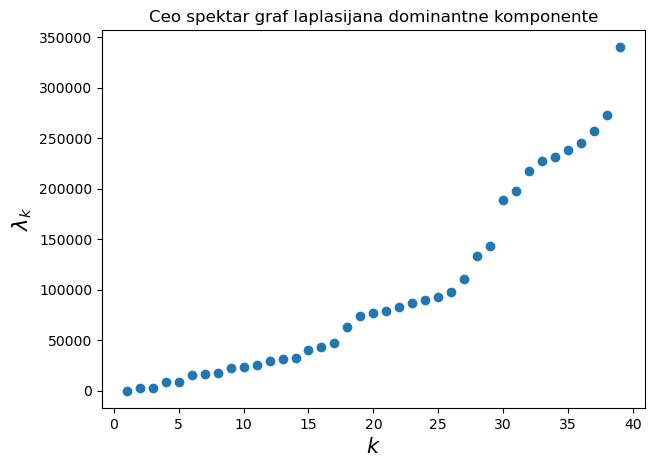

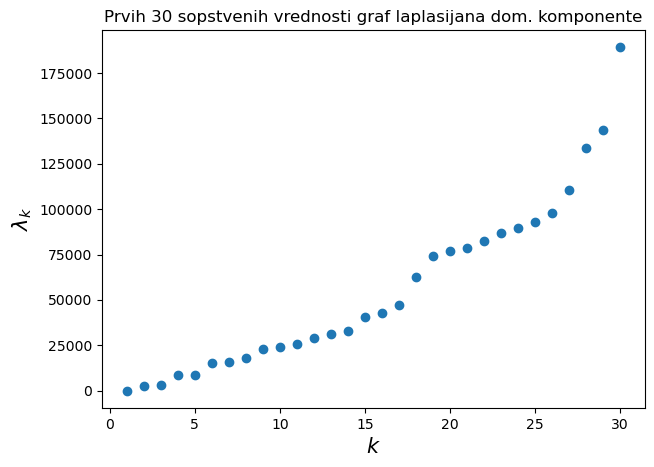

In [61]:
dominant_component = G2 #vec je dominantna

L_dom = nx.laplacian_matrix(dominant_component).toarray()

eigenvalues = linalg.eigvals(L_dom) # TODO: change to .eigenvalsh because we know the matrix is symmetric
eigenvalues.sort()
enumerator = np.array(range(1, len(eigenvalues)+1))
df_eig = pd.DataFrame(list(zip(enumerator, eigenvalues)))

# write eigenvalue table
df_eig30 = df_eig[:30]
df_eig30.columns = ['k', 'lambda_k']
df_eig30 = df_eig30.astype({'k': 'int32', 'lambda_k':'float'})
print(df_eig30)


plot_scatterplot(enumerator, eigenvalues, r'$k$', r'$\lambda_k$', 'Ceo spektar graf laplasijana dominantne komponente')

df_eig_30 = df_eig[:30]
plot_scatterplot(df_eig_30.iloc[:,0], df_eig_30.iloc[:,1], r'$k$', r'$\lambda_k$', 'Prvih 30 sopstvenih vrednosti graf laplasijana dom. komponente')


C:\Users\Marina\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1201: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


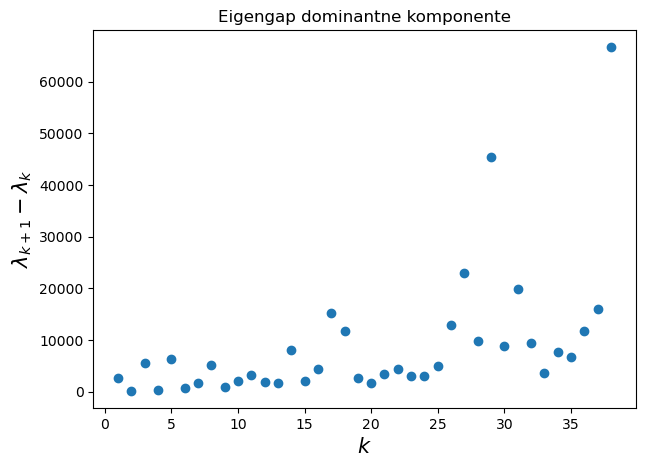

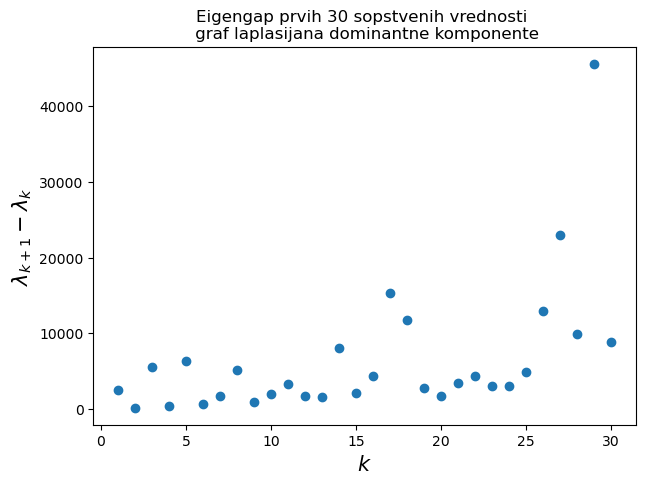

In [62]:
# eigengap

df_gap = df_eig.iloc[:,1].diff()
df_gap = df_gap.astype(np.float64)

df_gap = df_gap[1:]
enumerator_column = np.array(range(1, len(df_gap)+1))

df_gap = pd.DataFrame(list(zip(enumerator_column, df_gap)))
  
plot_scatterplot(df_gap.iloc[:,0], df_gap.iloc[:,1], r'$k$', r'$\lambda_{k+1}-\lambda_k$','Eigengap dominantne komponente')

plot_scatterplot2(df_gap.iloc[:30,0], df_gap.iloc[:30,1], r'$k$', r'$\lambda_{k+1}-\lambda_k$','Eigengap prvih 30 sopstvenih vrednosti \n graf laplasijana dominantne komponente', 'Eigengap prvih 30 sopstvenih vrednosti graf laplasijana dominantne komponente')

In [63]:
#//deo koji radi klasterisanje!!

for k in range(2, 30):
    
    #//prima broj klastera (n_cluster), a fit matricu slicnosti, odn. ako su tezine u pitanju matricu susednosti iz networkx
    clustering = SpectralClustering(n_clusters=k,
    assign_labels="discretize", affinity="precomputed").fit(nx.adjacency_matrix(dominant_component))

    colors = clustering.labels_
    c_string = []
    for c in colors:
        c_string.append(str(c))

    G = nx.Graph()
    for c, label in zip(c_string, dominant_component.nodes()):
        G.add_node(label, color=c)

    for edge in dominant_component.edges(data=True):
        #print(edge)
        G.add_edge(edge[0], edge[1], weight=edge[2]['weight'])

    nx.write_gml(G, "spectral.gml")
    
    csizes = np.zeros(k)
    for c in colors:
        csizes[int(c)] += 1
    
    print(f"Podela na {k}: velicine komponenata su {csizes}")
    

Podela na 2: velicine komponenata su [21. 18.]
Podela na 3: velicine komponenata su [ 5. 18. 16.]
Podela na 4: velicine komponenata su [11. 11.  5. 12.]
Podela na 5: velicine komponenata su [ 9. 11.  4.  4. 11.]
Podela na 6: velicine komponenata su [14.  4.  4. 10.  7.  0.]
Podela na 7: velicine komponenata su [16.  1.  1. 15.  6.  0.  0.]
Podela na 8: velicine komponenata su [ 6.  1. 11.  1.  1.  1.  6. 12.]
Podela na 9: velicine komponenata su [18.  1.  1.  1. 12.  2.  3.  0.  1.]
Podela na 10: velicine komponenata su [11.  1.  1.  1. 11.  2.  1.  1.  5.  5.]
Podela na 11: velicine komponenata su [ 1. 14.  2.  1.  1.  1.  1.  4. 11.  1.  2.]
Podela na 12: velicine komponenata su [10.  1.  1.  1.  1. 11.  1.  1.  3.  5.  4.  0.]
Podela na 13: velicine komponenata su [ 3.  9.  1.  1.  1.  1.  1.  5.  1. 12.  1.  3.  0.]
Podela na 14: velicine komponenata su [ 3.  7.  1.  1.  1.  2. 13.  1.  1.  1.  4.  1.  2.  1.]
Podela na 15: velicine komponenata su [ 1.  9.  1.  1.  1.  1.  2.  2.  

Na osnovu spektralne analize procenjujemo da je dobar izbor za broj komuna 5, 14, 17, 18, 28 i 29.

Sprovesti klasterisanje Luvenskom metodom (maksimizacijom modularnosti) u alatu 
Gephi za tri različite vrednosti parametra rezolucije. Konstruisati vizuelizacije i 
diskutovati izbor parametra rezolucije na dobijeno klasterisanje (broj i veličina klastera).

Resolution: 0.1
Modularity: -0.042
Modularity with resolution: -0.077
Number of Communities: 17
Ima 17 klastera, od toga se veličinom ističe jedan klaster sa 4 čvora u njemu
    
Resolution: 1.0
Modularity: 0.034
Modularity with resolution: 0.034
Number of Communities: 2
Ima 2 klastera, veličine 13 i 26 čvorova u njemu 
    
Resolution: 2.0
Modularity: 0.000
Modularity with resolution: 1.000
Number of Communities: 1
Ima samo  klaster, sa svih 39 čvorova u njemu


Čvorovi sa najvećim stepenom za dva najveća klastera za rezoluciju 1.0 putem Luvenske metode prikazana su na sledećim slikama:


Ko su akteri koji se mogu okarakterisati kao ključni brokeri (mostovi) u mreži? Šta ih čini brokerima?

S obzirom da je graf potpuno povezan i da svi čvorovi imaju istu relacionu centralnost, ne mogu se izdvojiti čvorovi koji predstavljaju brokere.